
## Imports

In [ ]:
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
tf.__version__

## Convert model

In [ ]:
keras_model = keras.models.load_model('./models/model_2024_hairstyle.keras')

In [ ]:
keras_model.summary()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model=keras_model)

tflite_model_path = './models/model_2024_hairstyle.tflite'
tflite_model = converter.convert()

with open(tflite_model_path, 'wb') as f_out:
    f_out.write(tflite_model)

## Map input and outputs

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

In [ ]:
interpreter.get_input_details()

In [ ]:
input_index = interpreter.get_input_details()[0]['index']
input_index

In [ ]:
interpreter.get_output_details()

In [ ]:
output_index = interpreter.get_output_details()[0]['index']
output_index

## Testing the Keras model

In [ ]:
_ = keras_model.input_shape[1]
target_size = (_, _)
target_size

In [ ]:
test_img = load_img('./models/yf_dokzqy3vcritme8ggnzqlvwa.jpeg', target_size=target_size)
# test_img = ImageDataGenerator(
#                 rescale = 1./255
#               ).flow_from_directory('./models/', 
#                                     target_size = target_size, 
#                                     batch_size  = 42,
#                                    )
test_img

In [ ]:
import numpy as np

x = np.array(test_img)
X = np.array([x])

# X = preprocess_input(X)
X.shape

In [ ]:
classes = ['placeholder']

pred_y = keras_model.predict(X)
float_preds = pred_y.tolist()

dict(zip(classes, float_preds[0]))

## Testing the TFLite Model

In [1]:
from PIL import Image
import numpy as np
import tensorflow as tf

In [2]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url:str):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size) #, Resampling.NEAREST)
    return img

In [3]:
tflite_model_path = './models/model_2024_hairstyle.tflite'

In [4]:
interpreter = tf.lite.Interpreter( model_path = tflite_model_path )
interpreter.allocate_tensors()

In [5]:
input_index = interpreter.get_input_details()[0]['index']
input_index

0

In [6]:
output_index = interpreter.get_output_details()[0]['index']
output_index

13

In [7]:
_ = int(interpreter.get_input_details()[0]['shape_signature'][1])
target_size = (_, _)
target_size

(200, 200)

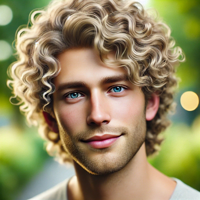

In [14]:
test_img = download_image('https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg')
test_img = prepare_image(test_img, target_size=target_size)
test_img

In [21]:
def preprocess_image(img):
    x = np.array(img, dtype='float32')
    
    X = np.array([x])
    
    X *= 1./255
    
    # X /= 127.5
    # X -= 1.
    return X

In [22]:
X = preprocess_image(test_img)

X.shape

(1, 200, 200, 3)

In [23]:
classes = ['placeholder']

interpreter.set_tensor(input_index, X)

interpreter.invoke()

pred_y = interpreter.get_tensor(output_index)
float_preds = pred_y.tolist()

dict(zip(classes, float_preds[0]))

{'placeholder': 0.9130955934524536}

## Answers

In [ ]:
!dir models


### Question 1

Now convert this model from Keras to TF-Lite format.

What's the size of the **converted** model?

* 27 Mb
* 43 Mb
* 77 Mb  `<--`
* 127 Mb

In [ ]:
output_index

### Question 2

To be able to use this model, we need to know the index of the input and 
the index of the output. 

What's the output index for this model?

* 3
* 7
* 13 `<--`
* 24

In [24]:
X

array([[[[0.24313727, 0.41176474, 0.09019608],
         [0.2392157 , 0.4156863 , 0.09803922],
         [0.24313727, 0.427451  , 0.11764707],
         ...,
         [0.24705884, 0.34901962, 0.00392157],
         [0.227451  , 0.3372549 , 0.00784314],
         [0.21568629, 0.32156864, 0.00784314]],

        [[0.2509804 , 0.41960788, 0.10980393],
         [0.25490198, 0.41960788, 0.11764707],
         [0.2627451 , 0.427451  , 0.13333334],
         ...,
         [0.25490198, 0.34509805, 0.00784314],
         [0.23529413, 0.32941177, 0.01176471],
         [0.21568629, 0.31764707, 0.01568628]],

        [[0.25882354, 0.43137258, 0.1254902 ],
         [0.2627451 , 0.427451  , 0.12941177],
         [0.2784314 , 0.43529415, 0.14117648],
         ...,
         [0.2509804 , 0.34509805, 0.02745098],
         [0.23529413, 0.3254902 , 0.02352941],
         [0.21176472, 0.3137255 , 0.01176471]],

        ...,

        [[0.10196079, 0.19607845, 0.03921569],
         [0.1137255 , 0.21176472, 0.0509804 ]

### Question 3


After the pre-processing, what's the value in the first pixel, the R channel?

* 0.24  `<--`
* 0.44
* 0.64
* 0.84

In [25]:
dict(zip(classes, float_preds[0]))

{'placeholder': 0.9130955934524536}

### Question 4

Now let's apply this model to this image. What's the output of the model?

* 0.293
* 0.493
* 0.693
* 0.893  `<--`

In [26]:
!docker images

REPOSITORY                                                                TAG          IMAGE ID       CREATED         SIZE
agrigorev/model-2024-hairstyle                                            v3           607850a2138e   3 days ago      782MB
nginx                                                                     latest       e0c9858e10ed   5 months ago    188MB
postgres                                                                  latest       74cc00b2e28f   7 months ago    432MB
ghcr.io/softcannery/camunda-formio-accelerator/camunda-formio-content     latest       6c3334fe08ac   10 months ago   247MB
ghcr.io/softcannery/camunda-formio-accelerator/camunda-formio-example     latest       c0b0295bcff7   10 months ago   297MB
ghcr.io/softcannery/camunda-formio-accelerator/camunda-formio-react-app   latest       0f4aea3cb17b   10 months ago   54.9MB
structurizr/lite                                                          latest       da535b96ed8b   16 months ago   457MB
vsc-volu

### Question 5

Download the base image `agrigorev/model-2024-hairstyle:v3`. You can do it with [`docker pull`](https://docs.docker.com/engine/reference/commandline/pull/).

So what's the size of this base image?

* 182 Mb
* 382 Mb
* 582 Mb
* 782 Mb  `<--`

In [31]:
import requests

baseurl = 'http://localhost:8080/2015-03-31/functions/function/invocations'

data = {
    "url": "https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg"
}

requests.post(baseurl, json=data).json()

{'placeholder': 0.4364568293094635}

### Question 6

Now let's extend this docker image, install all the required libraries
and add the code for lambda.

You don't need to include the model in the image. It's already included. 
The name of the file with the model is `model_2024_hairstyle_v2.tflite` and it's 
in the current workdir in the image (see the Dockerfile above for the 
reference). 
The provided model requires the same preprocessing for images regarding target size and rescaling the value range than used in homework 8.

Now run the container locally.

Score this image: https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg

What's the output from the model?

* 0.229
* 0.429  `<--`
* 0.629
* 0.829
